## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9828726	total: 58.3ms	remaining: 58.2s
1:	learn: 0.9643933	total: 59.2ms	remaining: 29.5s
2:	learn: 0.9440622	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9277588	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9115479	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8948348	total: 63.7ms	remaining: 10.6s
6:	learn: 0.8799960	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8644032	total: 65.7ms	remaining: 8.14s
8:	learn: 0.8477142	total: 66.6ms	remaining: 7.34s
9:	learn: 0.8315909	total: 67.4ms	remaining: 6.67s
10:	learn: 0.8164597	total: 68.1ms	remaining: 6.13s
11:	learn: 0.8026905	total: 69ms	remaining: 5.68s
12:	learn: 0.7879846	total: 69.7ms	remaining: 5.29s
13:	learn: 0.7723767	total: 70.4ms	remaining: 4.96s
14:	learn: 0.7601735	total: 71.2ms	remaining: 4.68s
15:	learn: 0.7474839	total: 72ms	remaining: 4.43s
16:	learn: 0.7361254	total: 72.8ms	remaining: 4.21s
17:	learn: 0.7236651	total: 73.5ms	remaining: 4.01s
18:	learn: 0.7115548	total: 74.4ms	remaining: 3.

57:	learn: 0.4336334	total: 109ms	remaining: 1.76s
58:	learn: 0.4301861	total: 110ms	remaining: 1.75s
59:	learn: 0.4269256	total: 111ms	remaining: 1.73s
60:	learn: 0.4232776	total: 111ms	remaining: 1.72s
61:	learn: 0.4200270	total: 112ms	remaining: 1.7s
62:	learn: 0.4172353	total: 113ms	remaining: 1.68s
63:	learn: 0.4135274	total: 114ms	remaining: 1.67s
64:	learn: 0.4100611	total: 115ms	remaining: 1.65s
65:	learn: 0.4064382	total: 116ms	remaining: 1.64s
66:	learn: 0.4026957	total: 116ms	remaining: 1.62s
67:	learn: 0.3989448	total: 117ms	remaining: 1.61s
68:	learn: 0.3954742	total: 118ms	remaining: 1.59s
69:	learn: 0.3922258	total: 119ms	remaining: 1.58s
70:	learn: 0.3881079	total: 120ms	remaining: 1.57s
71:	learn: 0.3850535	total: 121ms	remaining: 1.55s
72:	learn: 0.3824242	total: 124ms	remaining: 1.57s
73:	learn: 0.3788316	total: 125ms	remaining: 1.56s
74:	learn: 0.3760214	total: 125ms	remaining: 1.55s
75:	learn: 0.3726892	total: 126ms	remaining: 1.53s
76:	learn: 0.3690244	total: 127m

148:	learn: 0.2593085	total: 192ms	remaining: 1.1s
149:	learn: 0.2585879	total: 193ms	remaining: 1.09s
150:	learn: 0.2576551	total: 194ms	remaining: 1.09s
151:	learn: 0.2570178	total: 195ms	remaining: 1.09s
152:	learn: 0.2560035	total: 196ms	remaining: 1.08s
153:	learn: 0.2553716	total: 196ms	remaining: 1.08s
154:	learn: 0.2543414	total: 197ms	remaining: 1.07s
155:	learn: 0.2533325	total: 198ms	remaining: 1.07s
156:	learn: 0.2525915	total: 199ms	remaining: 1.07s
157:	learn: 0.2520133	total: 200ms	remaining: 1.06s
158:	learn: 0.2509656	total: 200ms	remaining: 1.06s
159:	learn: 0.2502633	total: 201ms	remaining: 1.06s
160:	learn: 0.2493856	total: 202ms	remaining: 1.05s
161:	learn: 0.2487702	total: 203ms	remaining: 1.05s
162:	learn: 0.2482863	total: 203ms	remaining: 1.04s
163:	learn: 0.2476584	total: 204ms	remaining: 1.04s
164:	learn: 0.2470626	total: 205ms	remaining: 1.04s
165:	learn: 0.2460679	total: 206ms	remaining: 1.03s
166:	learn: 0.2453447	total: 207ms	remaining: 1.03s
167:	learn: 0

270:	learn: 0.1864528	total: 299ms	remaining: 803ms
271:	learn: 0.1860210	total: 300ms	remaining: 802ms
272:	learn: 0.1857674	total: 301ms	remaining: 800ms
273:	learn: 0.1854411	total: 301ms	remaining: 799ms
274:	learn: 0.1849232	total: 303ms	remaining: 798ms
275:	learn: 0.1847367	total: 304ms	remaining: 796ms
276:	learn: 0.1843897	total: 304ms	remaining: 794ms
277:	learn: 0.1839870	total: 305ms	remaining: 793ms
278:	learn: 0.1835523	total: 306ms	remaining: 791ms
279:	learn: 0.1831778	total: 307ms	remaining: 789ms
280:	learn: 0.1825379	total: 308ms	remaining: 788ms
281:	learn: 0.1823040	total: 309ms	remaining: 786ms
282:	learn: 0.1820909	total: 309ms	remaining: 784ms
283:	learn: 0.1816008	total: 310ms	remaining: 782ms
284:	learn: 0.1811725	total: 311ms	remaining: 781ms
285:	learn: 0.1807595	total: 312ms	remaining: 779ms
286:	learn: 0.1802020	total: 313ms	remaining: 777ms
287:	learn: 0.1797861	total: 314ms	remaining: 776ms
288:	learn: 0.1792246	total: 315ms	remaining: 774ms
289:	learn: 

363:	learn: 0.1532040	total: 383ms	remaining: 669ms
364:	learn: 0.1530553	total: 384ms	remaining: 667ms
365:	learn: 0.1527223	total: 384ms	remaining: 666ms
366:	learn: 0.1524882	total: 385ms	remaining: 665ms
367:	learn: 0.1521471	total: 386ms	remaining: 663ms
368:	learn: 0.1518868	total: 387ms	remaining: 662ms
369:	learn: 0.1515652	total: 388ms	remaining: 660ms
370:	learn: 0.1514096	total: 389ms	remaining: 659ms
371:	learn: 0.1510933	total: 389ms	remaining: 658ms
372:	learn: 0.1507384	total: 390ms	remaining: 656ms
373:	learn: 0.1503740	total: 391ms	remaining: 655ms
374:	learn: 0.1502934	total: 392ms	remaining: 654ms
375:	learn: 0.1498912	total: 393ms	remaining: 652ms
376:	learn: 0.1495597	total: 394ms	remaining: 651ms
377:	learn: 0.1492120	total: 395ms	remaining: 650ms
378:	learn: 0.1489451	total: 396ms	remaining: 648ms
379:	learn: 0.1487159	total: 396ms	remaining: 647ms
380:	learn: 0.1484145	total: 397ms	remaining: 645ms
381:	learn: 0.1480541	total: 398ms	remaining: 644ms
382:	learn: 

480:	learn: 0.1259144	total: 490ms	remaining: 529ms
481:	learn: 0.1257213	total: 491ms	remaining: 528ms
482:	learn: 0.1256591	total: 492ms	remaining: 526ms
483:	learn: 0.1254049	total: 492ms	remaining: 525ms
484:	learn: 0.1251014	total: 493ms	remaining: 524ms
485:	learn: 0.1250735	total: 494ms	remaining: 522ms
486:	learn: 0.1248569	total: 495ms	remaining: 521ms
487:	learn: 0.1245793	total: 496ms	remaining: 520ms
488:	learn: 0.1241584	total: 496ms	remaining: 519ms
489:	learn: 0.1240979	total: 497ms	remaining: 518ms
490:	learn: 0.1239365	total: 498ms	remaining: 516ms
491:	learn: 0.1237482	total: 499ms	remaining: 515ms
492:	learn: 0.1235576	total: 500ms	remaining: 514ms
493:	learn: 0.1233749	total: 501ms	remaining: 513ms
494:	learn: 0.1232407	total: 502ms	remaining: 512ms
495:	learn: 0.1232091	total: 502ms	remaining: 511ms
496:	learn: 0.1230009	total: 503ms	remaining: 510ms
497:	learn: 0.1227803	total: 504ms	remaining: 508ms
498:	learn: 0.1225190	total: 505ms	remaining: 507ms
499:	learn: 

577:	learn: 0.1089922	total: 574ms	remaining: 419ms
578:	learn: 0.1087425	total: 575ms	remaining: 418ms
579:	learn: 0.1085668	total: 576ms	remaining: 417ms
580:	learn: 0.1084120	total: 576ms	remaining: 416ms
581:	learn: 0.1081536	total: 577ms	remaining: 415ms
582:	learn: 0.1078573	total: 578ms	remaining: 413ms
583:	learn: 0.1077050	total: 579ms	remaining: 412ms
584:	learn: 0.1076058	total: 580ms	remaining: 411ms
585:	learn: 0.1074007	total: 581ms	remaining: 410ms
586:	learn: 0.1073655	total: 581ms	remaining: 409ms
587:	learn: 0.1071825	total: 582ms	remaining: 408ms
588:	learn: 0.1070481	total: 583ms	remaining: 407ms
589:	learn: 0.1069362	total: 584ms	remaining: 406ms
590:	learn: 0.1068871	total: 585ms	remaining: 405ms
591:	learn: 0.1068420	total: 585ms	remaining: 404ms
592:	learn: 0.1066295	total: 586ms	remaining: 402ms
593:	learn: 0.1065820	total: 587ms	remaining: 401ms
594:	learn: 0.1063353	total: 588ms	remaining: 400ms
595:	learn: 0.1061240	total: 589ms	remaining: 399ms
596:	learn: 

699:	learn: 0.0892292	total: 681ms	remaining: 292ms
700:	learn: 0.0890585	total: 682ms	remaining: 291ms
701:	learn: 0.0888321	total: 683ms	remaining: 290ms
702:	learn: 0.0886364	total: 684ms	remaining: 289ms
703:	learn: 0.0884505	total: 685ms	remaining: 288ms
704:	learn: 0.0882799	total: 686ms	remaining: 287ms
705:	learn: 0.0881819	total: 687ms	remaining: 286ms
706:	learn: 0.0880208	total: 688ms	remaining: 285ms
707:	learn: 0.0879037	total: 689ms	remaining: 284ms
708:	learn: 0.0877926	total: 690ms	remaining: 283ms
709:	learn: 0.0876828	total: 690ms	remaining: 282ms
710:	learn: 0.0875167	total: 691ms	remaining: 281ms
711:	learn: 0.0874424	total: 692ms	remaining: 280ms
712:	learn: 0.0872873	total: 693ms	remaining: 279ms
713:	learn: 0.0871563	total: 694ms	remaining: 278ms
714:	learn: 0.0870863	total: 695ms	remaining: 277ms
715:	learn: 0.0868212	total: 696ms	remaining: 276ms
716:	learn: 0.0866178	total: 697ms	remaining: 275ms
717:	learn: 0.0864933	total: 697ms	remaining: 274ms
718:	learn: 

794:	learn: 0.0777240	total: 764ms	remaining: 197ms
795:	learn: 0.0776383	total: 765ms	remaining: 196ms
796:	learn: 0.0774851	total: 766ms	remaining: 195ms
797:	learn: 0.0773375	total: 767ms	remaining: 194ms
798:	learn: 0.0772599	total: 768ms	remaining: 193ms
799:	learn: 0.0771750	total: 769ms	remaining: 192ms
800:	learn: 0.0770529	total: 770ms	remaining: 191ms
801:	learn: 0.0769525	total: 770ms	remaining: 190ms
802:	learn: 0.0768276	total: 771ms	remaining: 189ms
803:	learn: 0.0767407	total: 772ms	remaining: 188ms
804:	learn: 0.0765912	total: 773ms	remaining: 187ms
805:	learn: 0.0764738	total: 773ms	remaining: 186ms
806:	learn: 0.0763552	total: 774ms	remaining: 185ms
807:	learn: 0.0762149	total: 775ms	remaining: 184ms
808:	learn: 0.0761255	total: 776ms	remaining: 183ms
809:	learn: 0.0760557	total: 777ms	remaining: 182ms
810:	learn: 0.0759242	total: 778ms	remaining: 181ms
811:	learn: 0.0758376	total: 779ms	remaining: 180ms
812:	learn: 0.0757875	total: 779ms	remaining: 179ms
813:	learn: 

916:	learn: 0.0666529	total: 872ms	remaining: 79ms
917:	learn: 0.0665488	total: 873ms	remaining: 78ms
918:	learn: 0.0665003	total: 874ms	remaining: 77.1ms
919:	learn: 0.0664313	total: 875ms	remaining: 76.1ms
920:	learn: 0.0663096	total: 876ms	remaining: 75.2ms
921:	learn: 0.0662595	total: 877ms	remaining: 74.2ms
922:	learn: 0.0661437	total: 878ms	remaining: 73.2ms
923:	learn: 0.0660660	total: 879ms	remaining: 72.3ms
924:	learn: 0.0659216	total: 880ms	remaining: 71.3ms
925:	learn: 0.0658096	total: 880ms	remaining: 70.4ms
926:	learn: 0.0656931	total: 881ms	remaining: 69.4ms
927:	learn: 0.0655879	total: 882ms	remaining: 68.4ms
928:	learn: 0.0655027	total: 883ms	remaining: 67.5ms
929:	learn: 0.0654900	total: 884ms	remaining: 66.5ms
930:	learn: 0.0653333	total: 885ms	remaining: 65.6ms
931:	learn: 0.0653019	total: 886ms	remaining: 64.6ms
932:	learn: 0.0651982	total: 886ms	remaining: 63.7ms
933:	learn: 0.0651042	total: 887ms	remaining: 62.7ms
934:	learn: 0.0649635	total: 888ms	remaining: 61.7

994:	learn: 0.0603129	total: 956ms	remaining: 4.8ms
995:	learn: 0.0602906	total: 957ms	remaining: 3.84ms
996:	learn: 0.0601730	total: 958ms	remaining: 2.88ms
997:	learn: 0.0600928	total: 959ms	remaining: 1.92ms
998:	learn: 0.0600869	total: 960ms	remaining: 960us
999:	learn: 0.0600106	total: 960ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

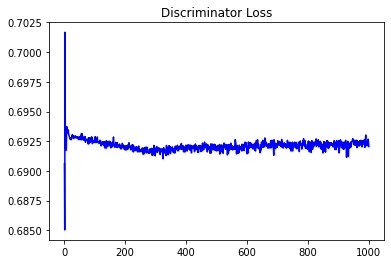

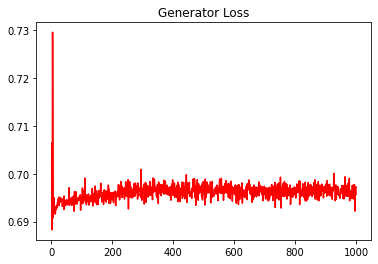

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10856275380907429


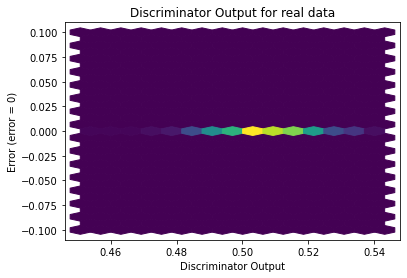

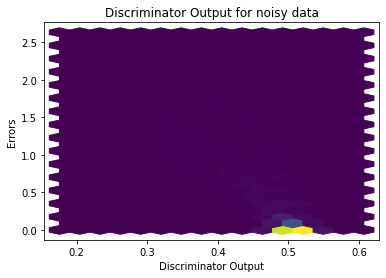

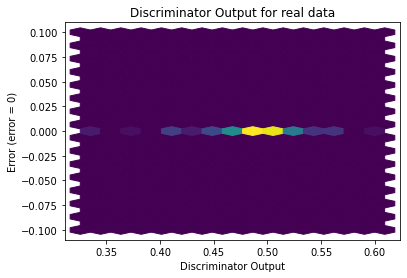

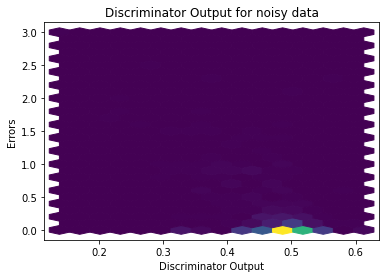

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


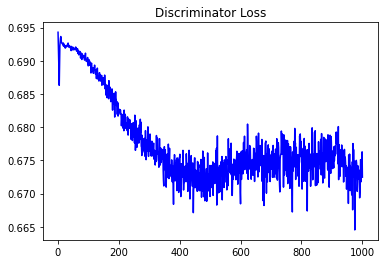

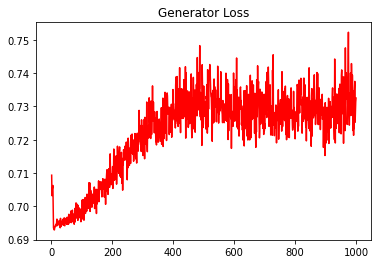

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1015663296297055


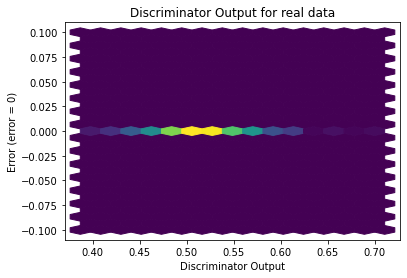

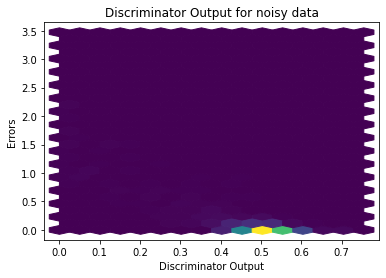

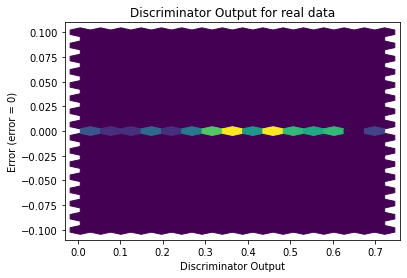

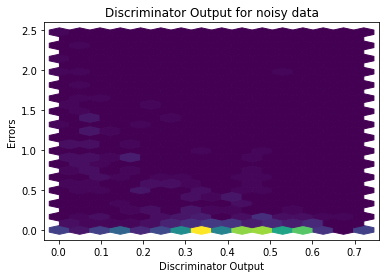

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3454]], requires_grad=True)
